In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
# load data
df = pd.read_csv("../input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv")

In [6]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

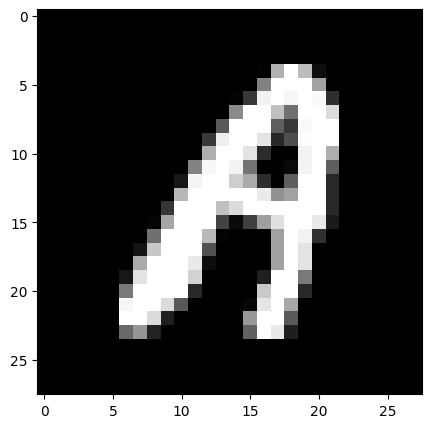

In [7]:
pixel_data =  df.iloc[0].drop('0').values

image_array = pixel_data.reshape(28, 28)


plt.figure(figsize=(5,5))
plt.imshow(image_array, cmap='gray')
plt.show()

In [8]:
X = df.drop('0', axis=1)
y = df['0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 70s 7ms/step - accuracy: 0.8156 - loss: 0.6494 - val_accuracy: 0.9568 - val_loss: 0.1628
Epoch 2/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 64s 7ms/step - accuracy: 0.9251 - loss: 0.2672 - val_accuracy: 0.9652 - val_loss: 0.1268
Epoch 3/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 64s 7ms/step - accuracy: 0.9386 - loss: 0.2184 - val_accuracy: 0.9688 - val_loss: 0.1110
Epoch 4/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 65s 7ms/step - accuracy: 0.9449 - loss: 0.1947 - val_accuracy: 0.9728 - val_loss: 0.0983
Epoch 5/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 66s 7ms/step - accuracy: 0.9490 - loss: 0.1793 - val_accuracy: 0.9753 - val_loss: 0.0861
Epoch 6/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy: 0.9524 - loss: 0.1688 - val_accuracy: 0.9759 - val_loss: 0.0858
Epoch 7/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 74s 8ms/step - accuracy: 0.9546 - loss: 0.1592 - val_accuracy: 0.9768 - val_loss: 0.0874
Epoch 8/10
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 67s 7ms/step - accuracy: 0.9576 - loss: 0

In [13]:
model.evaluate(X_test,y_test)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9781 - loss: 0.0815


[0.09016616642475128, 0.9788830876350403]

In [14]:
y_pred = model.predict(X_test)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step


In [23]:
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes, labels=np.arange(26))

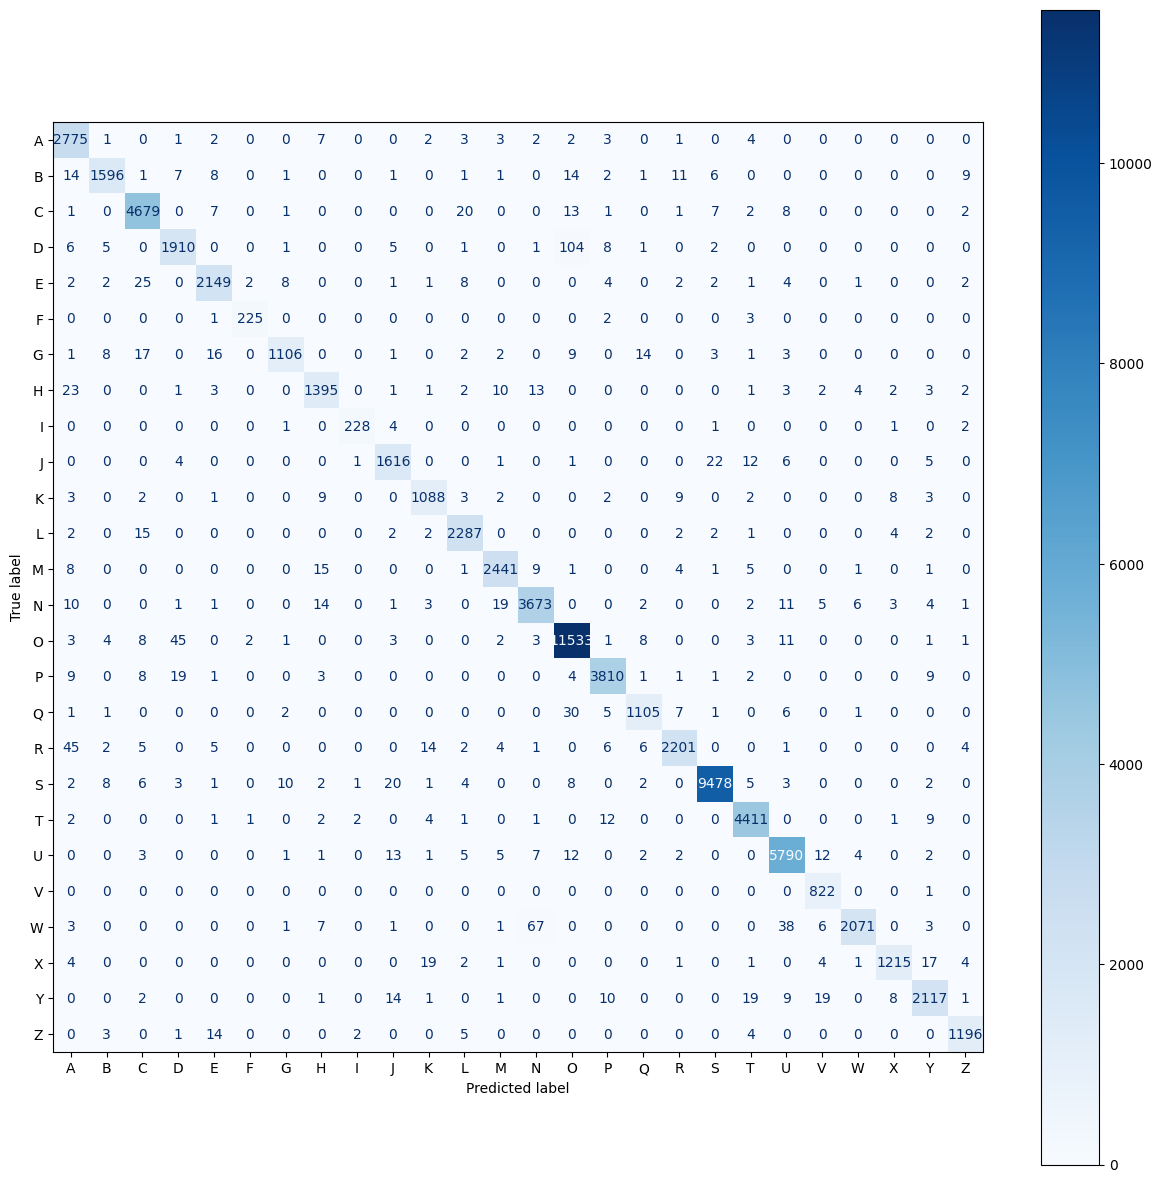

In [25]:
plt.figure(figsize=(15, 15))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[chr(i) for i in range(65, 91)])
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())  # Use the current axes with larger figure size
plt.show()
